# **Artificial Intelligence Project of Student Performance Prediction with Machine Learning**

# Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Machine Learning Dataset/student-performance-dataset.csv' #put the file path according to your dataset allocation path

test_dataframe = pd.read_csv(file_path)

In [ ]:
test_dataframe.count()

school                 395
sex                    395
age                    395
address                395
famsize                395
Pstatus                395
Medu                   395
Fedu                   395
Mjob                   395
Fjob                   395
reason                 395
guardian               395
traveltime             395
studytime              395
failures               395
schoolsup              395
famsup                 395
paid                   395
activities             395
nursery                395
higher                 395
internet               395
romantic               395
famrel                 395
freetime               395
goout                  395
Dalc                   395
Walc                   395
health                 395
absences               395
first_period_grade     395
second_period_grade    395
final_grade            395
dtype: int64

https://www.kaggle.com/datasets/ishandutta/student-performance-data-set

In [ ]:
test_dataframe.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,first_period_grade,second_period_grade,final_grade
263,GP,F,17,U,GT3,T,3,3,other,other,...,3,2,3,1,1,4,4,10,9,9
264,GP,F,18,U,GT3,T,2,2,at_home,services,...,4,3,3,1,1,3,0,9,10,0
274,GP,F,17,U,GT3,T,2,4,at_home,health,...,4,3,3,1,1,1,2,10,10,10
376,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15
192,GP,M,17,U,GT3,T,1,2,at_home,services,...,4,4,4,4,5,5,12,7,8,8


In [ ]:
dataframe = test_dataframe.copy()

# Exploratory Data Analysis

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   school               395 non-null    object
 1   sex                  395 non-null    object
 2   age                  395 non-null    int64 
 3   address              395 non-null    object
 4   famsize              395 non-null    object
 5   Pstatus              395 non-null    object
 6   Medu                 395 non-null    int64 
 7   Fedu                 395 non-null    int64 
 8   Mjob                 395 non-null    object
 9   Fjob                 395 non-null    object
 10  reason               395 non-null    object
 11  guardian             395 non-null    object
 12  traveltime           395 non-null    int64 
 13  studytime            395 non-null    int64 
 14  failures             395 non-null    int64 
 15  schoolsup            395 non-null    object
 16  famsup  

In [ ]:
dataframe.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,first_period_grade,second_period_grade,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
feature_names_array = dataframe.columns.values

In [ ]:
feature_names_array

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'first_period_grade', 'second_period_grade',
       'final_grade'], dtype=object)

**Pairplot**

In [ ]:
sns.pairplot(dataframe, vars=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'first_period_grade', 'second_period_grade',
       'final_grade'])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

**Heatmap**

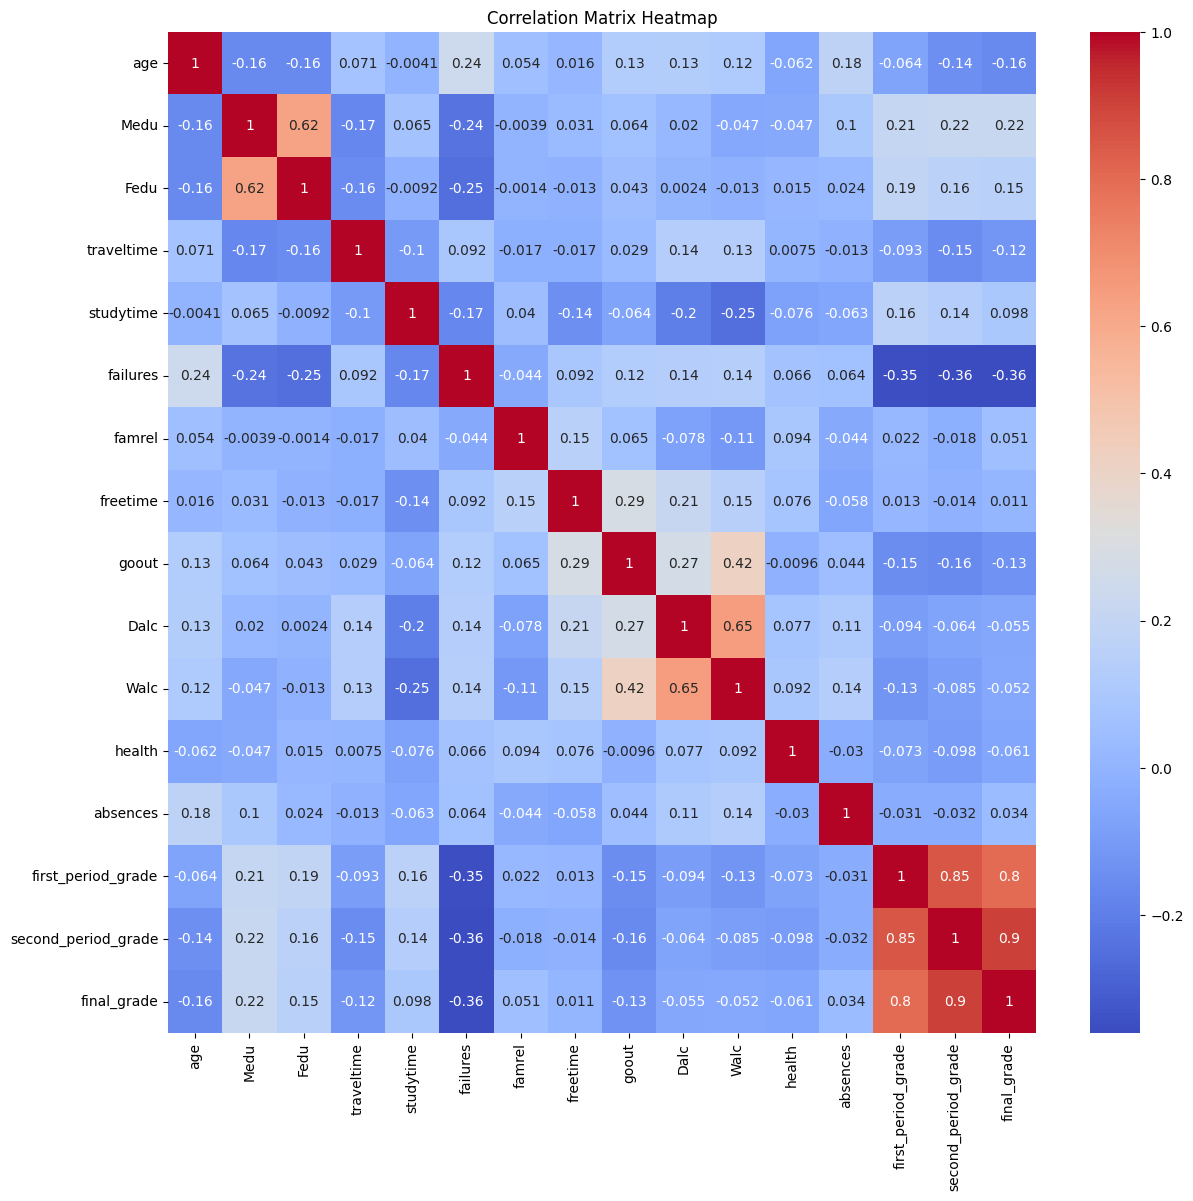

In [ ]:
correlation_matrix = dataframe.corr()
plt.figure(figsize=(14, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Preprocessing

**Null Value Check**

In [ ]:
dataframe.isnull().sum()

school                 0
sex                    0
age                    0
address                0
famsize                0
Pstatus                0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
higher                 0
internet               0
romantic               0
famrel                 0
freetime               0
goout                  0
Dalc                   0
Walc                   0
health                 0
absences               0
first_period_grade     0
second_period_grade    0
final_grade            0
dtype: int64

In [ ]:
dataframe.count()

school                 395
sex                    395
age                    395
address                395
famsize                395
Pstatus                395
Medu                   395
Fedu                   395
Mjob                   395
Fjob                   395
reason                 395
guardian               395
traveltime             395
studytime              395
failures               395
schoolsup              395
famsup                 395
paid                   395
activities             395
nursery                395
higher                 395
internet               395
romantic               395
famrel                 395
freetime               395
goout                  395
Dalc                   395
Walc                   395
health                 395
absences               395
first_period_grade     395
second_period_grade    395
final_grade            395
dtype: int64

**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
min_max_scaler.fit(dataframe[['final_grade']])
dataframe['final_grade'] = min_max_scaler.transform(dataframe[['final_grade']])

min_max_scaler.fit(dataframe[['second_period_grade']])
dataframe['second_period_grade'] = min_max_scaler.transform(dataframe[['second_period_grade']])

In [ ]:
min_max_scaler.fit(dataframe[['first_period_grade']])
dataframe['first_period_grade'] = min_max_scaler.transform(dataframe[['first_period_grade']])

min_max_scaler.fit(dataframe[['age']])
dataframe['age'] = min_max_scaler.transform(dataframe[['age']])

In [ ]:
dataframe.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,first_period_grade,second_period_grade,final_grade
223,GP,M,0.428571,U,GT3,T,2,2,other,other,...,3,3,3,5,5,4,0,0.5625,0.684211,0.65
78,GP,M,0.285714,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,2,0.3125,0.421053,0.50
55,GP,F,0.142857,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,8,0.3125,0.473684,0.50
42,GP,M,0.000000,U,GT3,T,4,4,services,teacher,...,4,3,3,1,1,5,2,1.0000,0.947368,0.90
255,GP,M,0.285714,U,LE3,T,1,1,health,other,...,4,4,4,1,2,5,2,0.2500,0.473684,0.40


# Encoding

In [ ]:
update_dataframe = dataframe.copy()

In [ ]:
update_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    float64
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    int64  
 7   Fedu                 395 non-null    int64  
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    int64  
 13  studytime            395 non-null    int64  
 14  failures             395 non-null    int64  
 15  schoolsup            395 non-null    obj

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinalencoder = OrdinalEncoder(categories=[['at_home', 'health', 'services', 'teacher', 'other'], ['at_home', 'health', 'services', 'teacher', 'other']])
update_dataframe[['Mjob', 'Fjob']] = ordinalencoder.fit_transform(update_dataframe[['Mjob', 'Fjob']])

In [ ]:
update_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    float64
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    int64  
 7   Fedu                 395 non-null    int64  
 8   Mjob                 395 non-null    float64
 9   Fjob                 395 non-null    float64
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    int64  
 13  studytime            395 non-null    int64  
 14  failures             395 non-null    int64  
 15  schoolsup            395 non-null    obj

In [ ]:
update_dataframe['address'].unique()

array(['U', 'R'], dtype=object)

In [ ]:
ordinalencoder = OrdinalEncoder(categories=[['mother', 'father', 'other'], ['home', 'course', 'reputation', 'other']])
update_dataframe[['guardian', 'reason']] = ordinalencoder.fit_transform(update_dataframe[['guardian', 'reason']])

In [ ]:
update_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    float64
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    int64  
 7   Fedu                 395 non-null    int64  
 8   Mjob                 395 non-null    float64
 9   Fjob                 395 non-null    float64
 10  reason               395 non-null    float64
 11  guardian             395 non-null    float64
 12  traveltime           395 non-null    int64  
 13  studytime            395 non-null    int64  
 14  failures             395 non-null    int64  
 15  schoolsup            395 non-null    obj

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [ ]:
update_dataframe['school'] = labelencoder.fit_transform(update_dataframe['school'])

In [ ]:
update_dataframe['sex'] = labelencoder.fit_transform(update_dataframe['sex'])
update_dataframe['internet'] = labelencoder.fit_transform(update_dataframe['internet'])
update_dataframe['higher'] = labelencoder.fit_transform(update_dataframe['higher'])
update_dataframe['nursery'] = labelencoder.fit_transform(update_dataframe['nursery'])
update_dataframe['activities'] = labelencoder.fit_transform(update_dataframe['activities'])
update_dataframe['paid'] = labelencoder.fit_transform(update_dataframe['paid'])
update_dataframe['famsup'] = labelencoder.fit_transform(update_dataframe['famsup'])
update_dataframe['schoolsup'] = labelencoder.fit_transform(update_dataframe['schoolsup'])
update_dataframe['Pstatus'] = labelencoder.fit_transform(update_dataframe['Pstatus'])
update_dataframe['famsize'] = labelencoder.fit_transform(update_dataframe['famsize'])
update_dataframe['address'] = labelencoder.fit_transform(update_dataframe['address'])

In [ ]:
update_dataframe['romantic'] = labelencoder.fit_transform(update_dataframe['romantic'])

In [ ]:
update_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    int64  
 1   sex                  395 non-null    int64  
 2   age                  395 non-null    float64
 3   address              395 non-null    int64  
 4   famsize              395 non-null    int64  
 5   Pstatus              395 non-null    int64  
 6   Medu                 395 non-null    int64  
 7   Fedu                 395 non-null    int64  
 8   Mjob                 395 non-null    float64
 9   Fjob                 395 non-null    float64
 10  reason               395 non-null    float64
 11  guardian             395 non-null    float64
 12  traveltime           395 non-null    int64  
 13  studytime            395 non-null    int64  
 14  failures             395 non-null    int64  
 15  schoolsup            395 non-null    int

Label encoder encodes to int type where ordinal encoder encodes to float type

In [ ]:
update_dataframe['guardian'] = update_dataframe['guardian'].round().astype(int)

In [ ]:
update_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    int64  
 1   sex                  395 non-null    int64  
 2   age                  395 non-null    float64
 3   address              395 non-null    int64  
 4   famsize              395 non-null    int64  
 5   Pstatus              395 non-null    int64  
 6   Medu                 395 non-null    int64  
 7   Fedu                 395 non-null    int64  
 8   Mjob                 395 non-null    float64
 9   Fjob                 395 non-null    float64
 10  reason               395 non-null    float64
 11  guardian             395 non-null    int64  
 12  traveltime           395 non-null    int64  
 13  studytime            395 non-null    int64  
 14  failures             395 non-null    int64  
 15  schoolsup            395 non-null    int

In [ ]:
update_dataframe['reason'] = update_dataframe['reason'].round().astype(int)
update_dataframe['Fjob'] = update_dataframe['Fjob'].round().astype(int)
update_dataframe['Mjob'] = update_dataframe['Mjob'].round().astype(int)
# update_dataframe['age'] = update_dataframe['age'].round().astype(int)

In [ ]:
update_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    int64  
 1   sex                  395 non-null    int64  
 2   age                  395 non-null    float64
 3   address              395 non-null    int64  
 4   famsize              395 non-null    int64  
 5   Pstatus              395 non-null    int64  
 6   Medu                 395 non-null    int64  
 7   Fedu                 395 non-null    int64  
 8   Mjob                 395 non-null    int64  
 9   Fjob                 395 non-null    int64  
 10  reason               395 non-null    int64  
 11  guardian             395 non-null    int64  
 12  traveltime           395 non-null    int64  
 13  studytime            395 non-null    int64  
 14  failures             395 non-null    int64  
 15  schoolsup            395 non-null    int

**Outlier Handling**

In [ ]:
from scipy.stats import zscore
import numpy as np

In [ ]:
z_scores = np.abs(zscore(update_dataframe))

In [ ]:
z_scores

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,first_period_grade,second_period_grade,final_grade
0,0.363050,0.948176,1.023046,0.535392,0.636941,2.938392,1.143856,1.360371,1.737049,0.020897,...,0.062194,0.236010,0.801479,0.540699,1.003789,0.399289,0.036424,1.782467,1.254791,0.964934
1,0.363050,0.948176,0.238380,0.535392,0.636941,0.340322,1.600009,1.399970,1.737049,0.804531,...,1.178860,0.236010,0.097908,0.540699,1.003789,0.399289,0.213796,1.782467,1.520979,0.964934
2,0.363050,0.948176,1.330954,0.535392,1.570004,0.340322,1.600009,1.399970,1.737049,0.804531,...,0.062194,0.236010,0.997295,0.583385,0.551100,0.399289,0.536865,1.179147,0.722415,0.090739
3,0.363050,0.948176,1.330954,0.535392,0.636941,0.340322,1.143856,0.479857,1.035480,0.846325,...,1.054472,1.238419,0.997295,0.540699,1.003789,1.041070,0.464016,1.234133,0.874715,1.002004
4,0.363050,0.948176,0.546287,0.535392,0.636941,0.340322,0.229234,0.440257,1.069226,0.804531,...,0.062194,0.236010,0.997295,0.540699,0.226345,1.041070,0.213796,1.480807,0.190038,0.090739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.754443,1.054656,2.592380,0.535392,1.570004,2.938392,0.685387,0.479857,0.333911,0.846325,...,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,0.575827,0.456226,0.309288
391,2.754443,1.054656,0.238380,0.535392,1.570004,0.340322,0.229234,1.399970,0.333911,0.846325,...,2.171138,0.766399,1.700867,1.707469,1.328545,1.119469,0.338906,0.932473,1.407091,1.220553
392,2.754443,1.054656,3.377047,1.867789,0.636941,0.340322,1.600009,1.399970,1.069226,0.804531,...,1.178860,1.768808,0.097908,1.707469,0.551100,0.399289,0.338906,0.274167,0.722415,0.746385
393,2.754443,1.054656,1.023046,1.867789,1.570004,0.340322,0.229234,0.479857,0.333911,0.804531,...,0.062194,0.766399,1.896683,1.707469,1.328545,1.041070,0.714236,0.027493,0.342338,0.090739


In [ ]:
threshold = 4

outliers = (z_scores > threshold).any(axis=1)

In [ ]:
outcome = update_dataframe[outliers]
print("Rows with outliers:")
print(outcome)

Rows with outliers:
     school  sex       age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
74        0    0  0.142857        1        0        1     3     3     4     2   
78        0    1  0.285714        1        0        1     2     1     4     4   
127       0    0  0.571429        1        0        1     0     1     0     4   
148       0    1  0.142857        1        0        1     4     4     3     3   
150       0    1  0.428571        1        1        1     1     1     4     4   
153       0    1  0.571429        1        0        1     3     2     2     0   
160       0    1  0.285714        0        1        1     2     1     0     4   
163       0    1  0.285714        1        0        1     1     3     0     2   
164       0    1  0.285714        0        1        1     1     1     4     2   
165       0    1  0.142857        1        0        1     3     2     2     2   
166       0    1  0.142857        1        0        1     2     2     4     4   
183     

# Feature Engineering

**Classifier**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
x = update_dataframe.drop(['final_grade'], axis=1)

In [ ]:
y = update_dataframe['final_grade']

In [ ]:
selectkbest = SelectKBest(score_func=f_classif)
selectkbest.fit(x,y)

SelectKBest()

In [ ]:
statement = pd.DataFrame(selectkbest.scores_, index=x.columns, columns=['Score'])
selected_statement = statement.nlargest(32, 'Score')
selected_statement

,Score
second_period_grade,145.931929
first_period_grade,90.677483
failures,6.115358
absences,3.810476
Walc,2.456415
schoolsup,1.989400
Dalc,1.952832
Medu,1.952109
romantic,1.834070
paid,1.807773


**Now we will select top 20 features based on the value of "Score" greater than and equal to 1.2. But we will take some features with low score but seemed important for the model**

In [ ]:
droplist = ['famrel', 'school', 'guardian', 'famsup', 'activities', 'nursery', 'Pstatus', 'Mjob', 'famsize', 'Fjob', 'health', 'sex']
selected_dataframe = update_dataframe.drop(droplist, axis=1)

In [ ]:
selected_dataframe.describe()

,age,address,Medu,Fedu,reason,traveltime,studytime,failures,schoolsup,paid,...,internet,romantic,freetime,goout,Dalc,Walc,absences,first_period_grade,second_period_grade,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.242315,0.777215,2.749367,2.521519,1.172152,1.448101,2.035443,0.334177,0.129114,0.458228,...,0.832911,0.334177,3.235443,3.108861,1.481013,2.291139,5.708861,0.494304,0.563891,0.520759
std,0.182292,0.416643,1.094735,1.088201,0.937506,0.697505,0.839240,0.743651,0.335751,0.498884,...,0.373528,0.472300,0.998862,1.113278,0.890741,1.287897,8.003096,0.207450,0.197974,0.229072
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.312500,0.473684,0.400000
50%,0.285714,1.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.500000,0.578947,0.550000
75%,0.428571,1.000000,4.000000,3.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,8.000000,0.625000,0.684211,0.700000
max,1.000000,1.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,75.000000,1.000000,1.000000,1.000000


# Training the Model

**We selected 21 features for now because some features seemed important even the score in low**

**Algorithm Implementation**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=3)

Multiple Linear Regression

In [ ]:
linearModel = LinearRegression()
linearModel.fit(x, y)

LinearRegression()

In [ ]:
y_pred_multiple_linear_regression = linearModel.predict(x_test)

Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=3)
elasticnet.fit(x, y)

ElasticNet(random_state=3)

In [ ]:
y_pred_elastic_net = elasticnet.predict(x_test)

Dicission Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dicisiontree_reg = DecisionTreeRegressor(random_state=5)
dicisiontree_reg.fit(x, y)

DecisionTreeRegressor(random_state=5)

In [ ]:
y_pred_dicisiontree_reg = dicisiontree_reg.predict(x_test)

Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomforestregressor = RandomForestRegressor(n_estimators=10)
randomforestregressor.fit(x, y)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred_randomforest_reg = randomforestregressor.predict(x_test)

Support Vector Regression

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(x, y)

SVR(kernel='linear')

In [ ]:
y_pred_svr = svr.predict(x_test)

KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knnR = KNeighborsRegressor(n_neighbors=10)
knnR.fit(x, y)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
y_pred_knnR = knnR.predict(x_test)

# Comparison Table

In [ ]:
mse_linear = mean_squared_error(y_test, y_pred_multiple_linear_regression)
mse_dicisiontree = mean_squared_error(y_test, y_pred_dicisiontree_reg)
mse_randomforest = mean_squared_error(y_test, y_pred_randomforest_reg)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_knnR = mean_squared_error(y_test, y_pred_knnR)
mse_elasticnet = mean_squared_error(y_test, y_pred_elastic_net)

In [ ]:
mae_linear = mean_absolute_error(y_test, y_pred_multiple_linear_regression)
mae_dicisiontree = mean_absolute_error(y_test, y_pred_dicisiontree_reg)
mae_randomforest = mean_absolute_error(y_test, y_pred_randomforest_reg)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mae_knnR = mean_absolute_error(y_test, y_pred_knnR)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elastic_net)

In [ ]:
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_multiple_linear_regression))
rmse_dicisiontree = np.sqrt(mean_squared_error(y_test, y_pred_dicisiontree_reg))
rmse_randomforest = np.sqrt(mean_squared_error(y_test, y_pred_randomforest_reg))
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
rmse_knnR = np.sqrt(mean_squared_error(y_test, y_pred_knnR))
rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))

In [ ]:
ac_linear = (r2_score(y_test, y_pred_multiple_linear_regression))*100
ac_dicisiontree = (r2_score(y_test, y_pred_dicisiontree_reg))*100
ac_randomforest = (r2_score(y_test, y_pred_randomforest_reg))*100
ac_svr = (r2_score(y_test, y_pred_svr))*100
ac_knnR = (r2_score(y_test, y_pred_knnR))*100
ac_elasticnet = (r2_score(y_test, y_pred_elastic_net))*100

In [ ]:
comparison_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Elastic Net Regression', 'Dicision Tree Regression', 'Random Forest Regression', 'Support Vector Regression', 'K-Nearest Neighbors (KNN) Regression'],
    'Mean_Squared_Error': [mse_linear, mse_elasticnet, mse_dicisiontree, mse_randomforest, mse_svr, mse_knnR],
    'Mean_Absolute_Error': [mae_linear, mae_elasticnet, mae_dicisiontree, mae_randomforest, mae_svr, mae_knnR],
    'Root_Mean_Squared_Error': [rmse_linear, rmse_elasticnet, rmse_dicisiontree, rmse_randomforest, rmse_svr, rmse_knnR],
    'Accuracy': [ac_linear, ac_elasticnet, ac_dicisiontree, ac_randomforest, ac_svr, ac_knnR],
})

In [ ]:
comparison_table

,Model,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Accuracy
0,Linear Regression,6.620871e-03,5.666628e-02,8.136874e-02,87.970835
1,Elastic Net Regression,5.506150e-02,1.766952e-01,2.346519e-01,-0.038784
2,Dicision Tree Regression,1.111676e-33,1.089143e-17,3.334181e-17,100.000000
3,Random Forest Regression,9.639241e-04,1.645570e-02,3.104713e-02,98.248690
4,Support Vector Regression,7.370047e-03,6.467695e-02,8.584898e-02,86.609692
5,K-Nearest Neighbors (KNN) Regression,3.307120e-02,1.411392e-01,1.818549e-01,39.914412
